In [1]:
#import all needed libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8)

In [2]:
#importing dataset
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [6]:
df.balcony.describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [10]:
#area_type and availability are not needed because location is sufficient for area_type and for ease let properties are ready to move
df1 = df.drop(['area_type', 'availability'], axis = 'columns')
df1.head()

,location,size,society,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [11]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
#drop society because it has 5502 missing values in whole dataset of 13000 rows. for ease also drop balcony feature
df1 = df1.drop(['balcony', 'society'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [15]:
#dropping empty rows
df2 = df1.dropna()
df2.shape

(13246, 5)

In [16]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
#creating a column named bhk for extracting number from size column
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_596464\3170147723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
#total sqft has some values in form of range so change these values with mean value of lower and upper bound of range 

In [21]:
def isFloat(x) :
    try:
        float(x)
    except:
        return False
    return True

In [23]:
#checking for ranging format values
df2[~df2['total_sqft'].apply(isFloat)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [24]:
#converting range to number(mean value)
def converts_range_to_num(x):
    tokens = x.split('-')
    if (len(tokens) == 2):
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(converts_range_to_num)
df3.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [26]:
df3 = df3.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [27]:
df3.shape

(13200, 6)

In [28]:
df4 = df3.copy()

In [29]:
#finding price per sqft and intial price is given in lakhs(100000)
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
len(df4.location.unique())

1298

In [31]:
df4.location = df4.location.apply(lambda x: x.strip()) #removing unnecessary space from first and last position
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield                         533
Sarjapur  Road                     392
Electronic City                    304
Kanakpura Road                     264
Thanisandra                        235
                                  ... 
beml layout, basaveshwara nagar      1
basaveshwarnagar                     1
1 Giri Nagar                         1
4 Bedroom Farm House in Bagalur      1
3rd Stage Raja Rajeshwari Nagar      1
Name: location, Length: 1287, dtype: int64

In [33]:
#location which has less than 10 properties
len(location_stats[location_stats <= 10])

1047

In [35]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
1st Block Koramangala              10
Thyagaraja Nagar                   10
Ganga Nagar                        10
Nagappa Reddy Layout               10
Gunjur Palya                       10
                                   ..
beml layout, basaveshwara nagar     1
basaveshwarnagar                    1
1 Giri Nagar                        1
4 Bedroom Farm House in Bagalur     1
3rd Stage Raja Rajeshwari Nagar     1
Name: location, Length: 1047, dtype: int64

In [36]:
#defining other class as location which have less than 10 properties
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

241

In [37]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [38]:
#finding outlier which have more or not possible bhk in small sqft area
total_sqft_per_bhk_outlier = df4[(df4['total_sqft'] / df4['bhk']) < 300]
total_sqft_per_bhk_outlier.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [39]:
total_sqft_per_bhk_outlier.shape

(744, 7)

In [40]:
#removing outliers
df5 = df4[df4['total_sqft']/df4['bhk'] >= 300]
df5.shape

(12456, 7)

In [41]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
#for finding and removing price per sqft outliers with z-score = 1 or 1 standard deviation
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        s = np.std(sub_df.price_per_sqft)
        res_df = sub_df[(sub_df.price_per_sqft > (m - s)) & (sub_df.price_per_sqft <= (m + s))]
        df_out = pd.concat([df_out, res_df], ignore_index = True)
    return df_out

In [43]:
df6 = remove_price_per_sqft_outliers(df5)
df6.shape

(10242, 7)

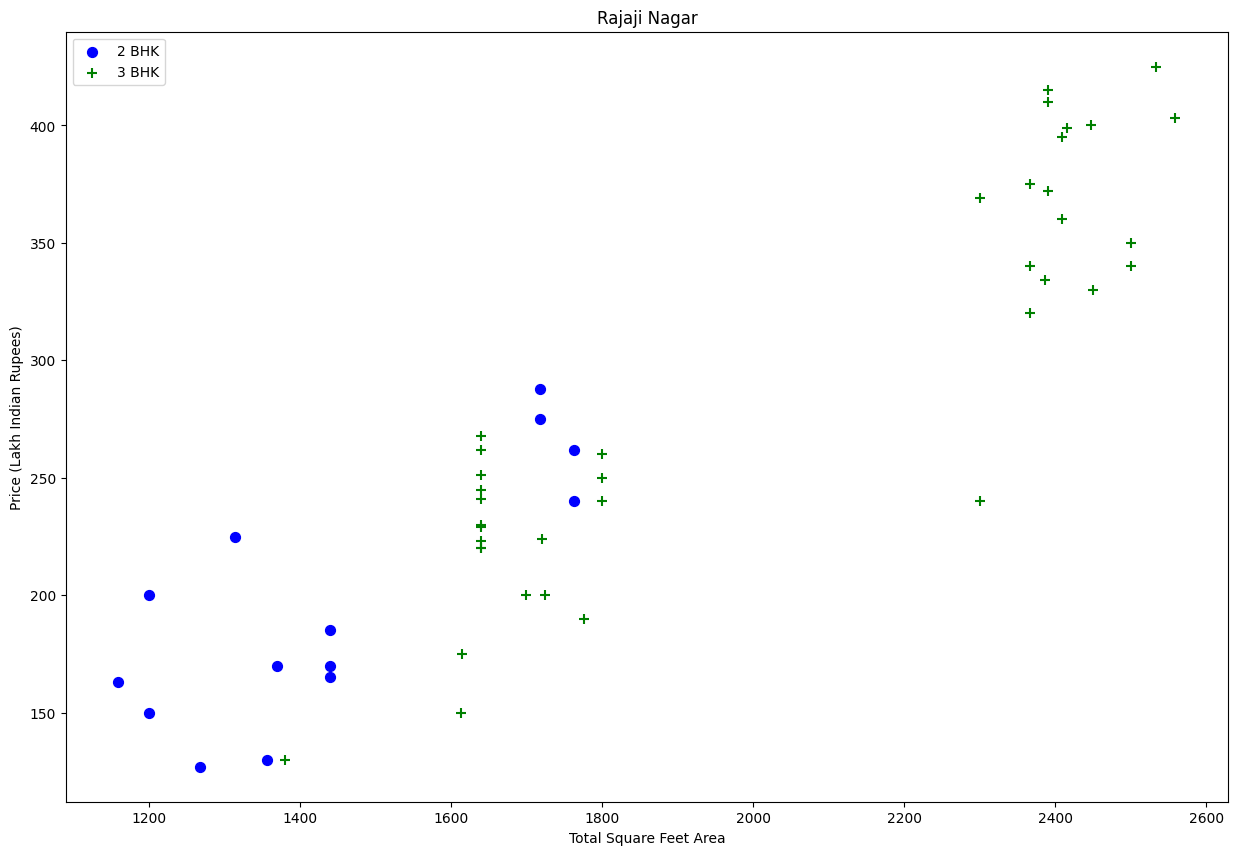

In [44]:
#plot for comparing price of properties according to bhk in same location
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

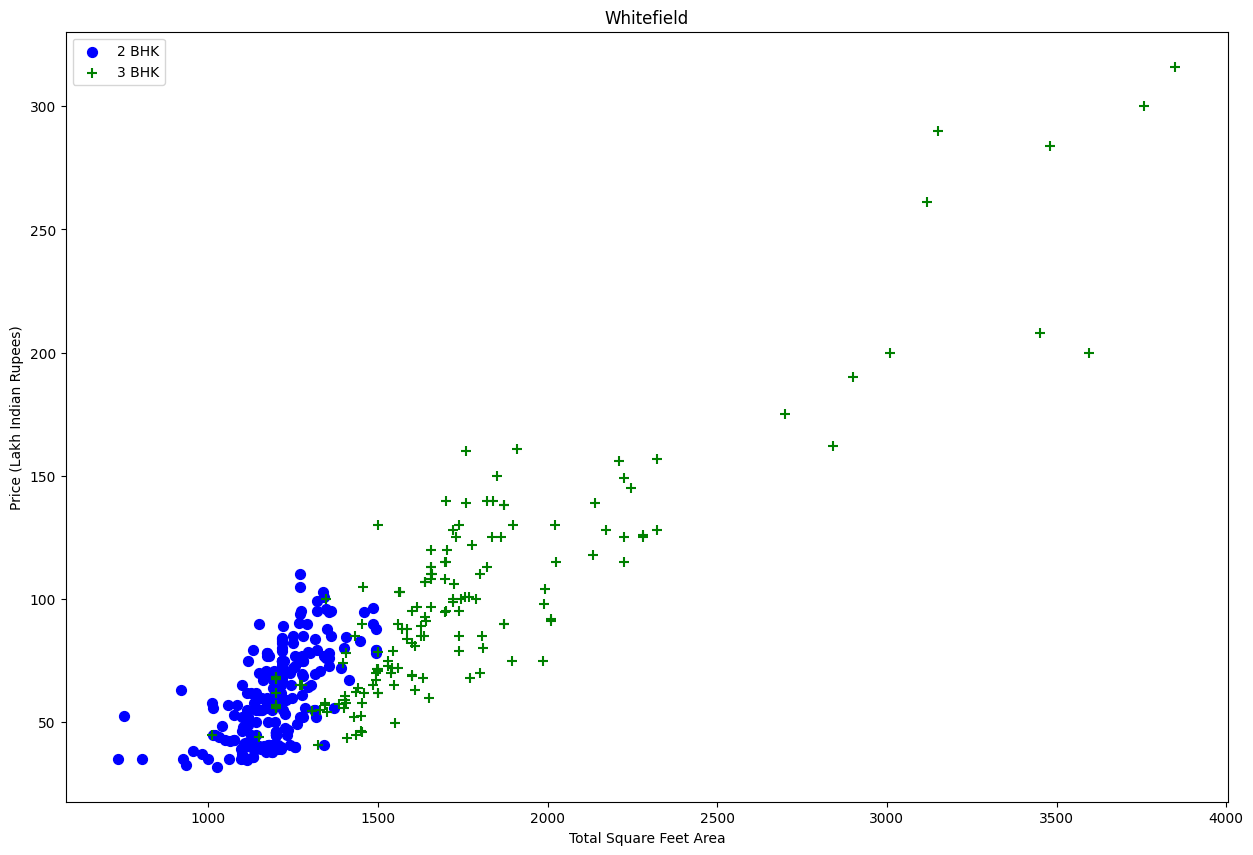

In [45]:
plot_scatter_chart(df6,"Whitefield")

In [46]:
#removing those outliers which have high price for less bhk property in same location

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(7317, 7)

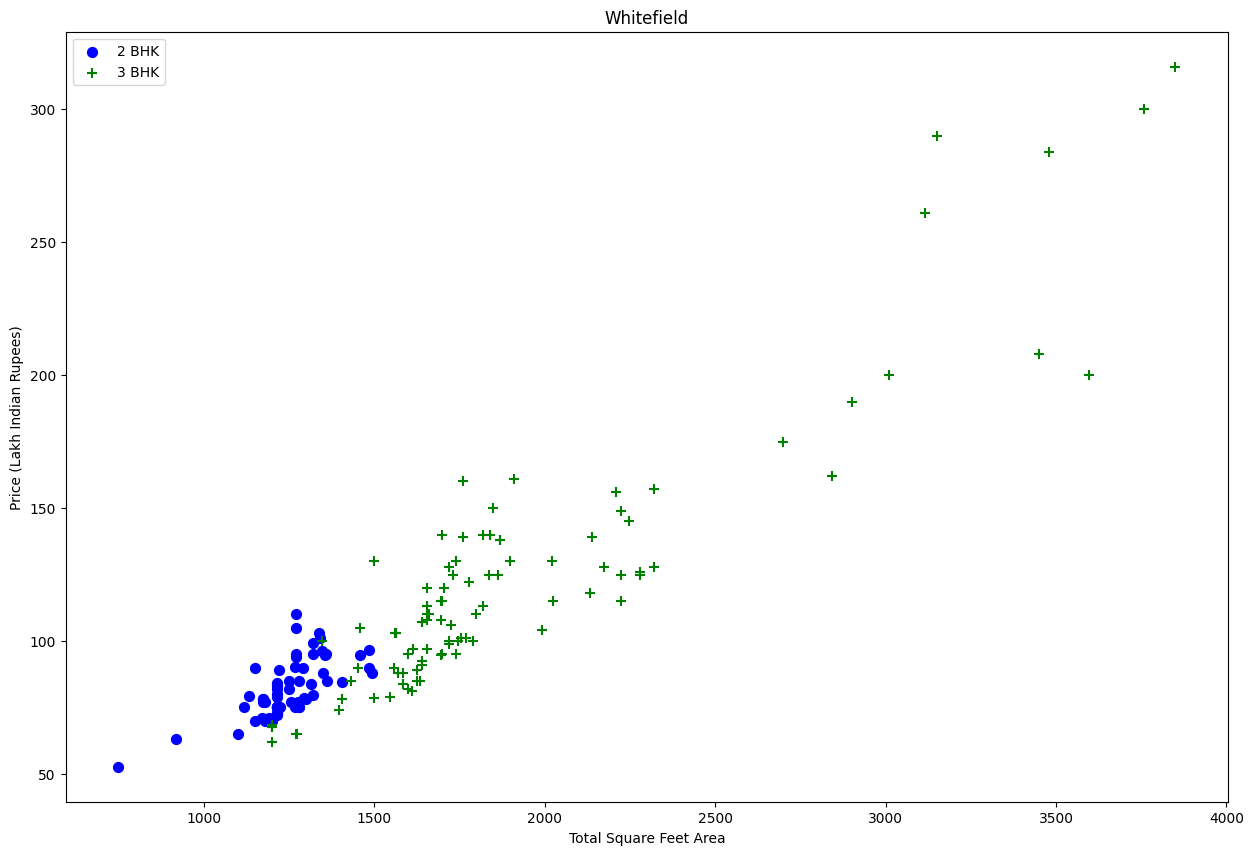

In [47]:
plot_scatter_chart(df7,"Whitefield")

Text(0, 0.5, 'Count')

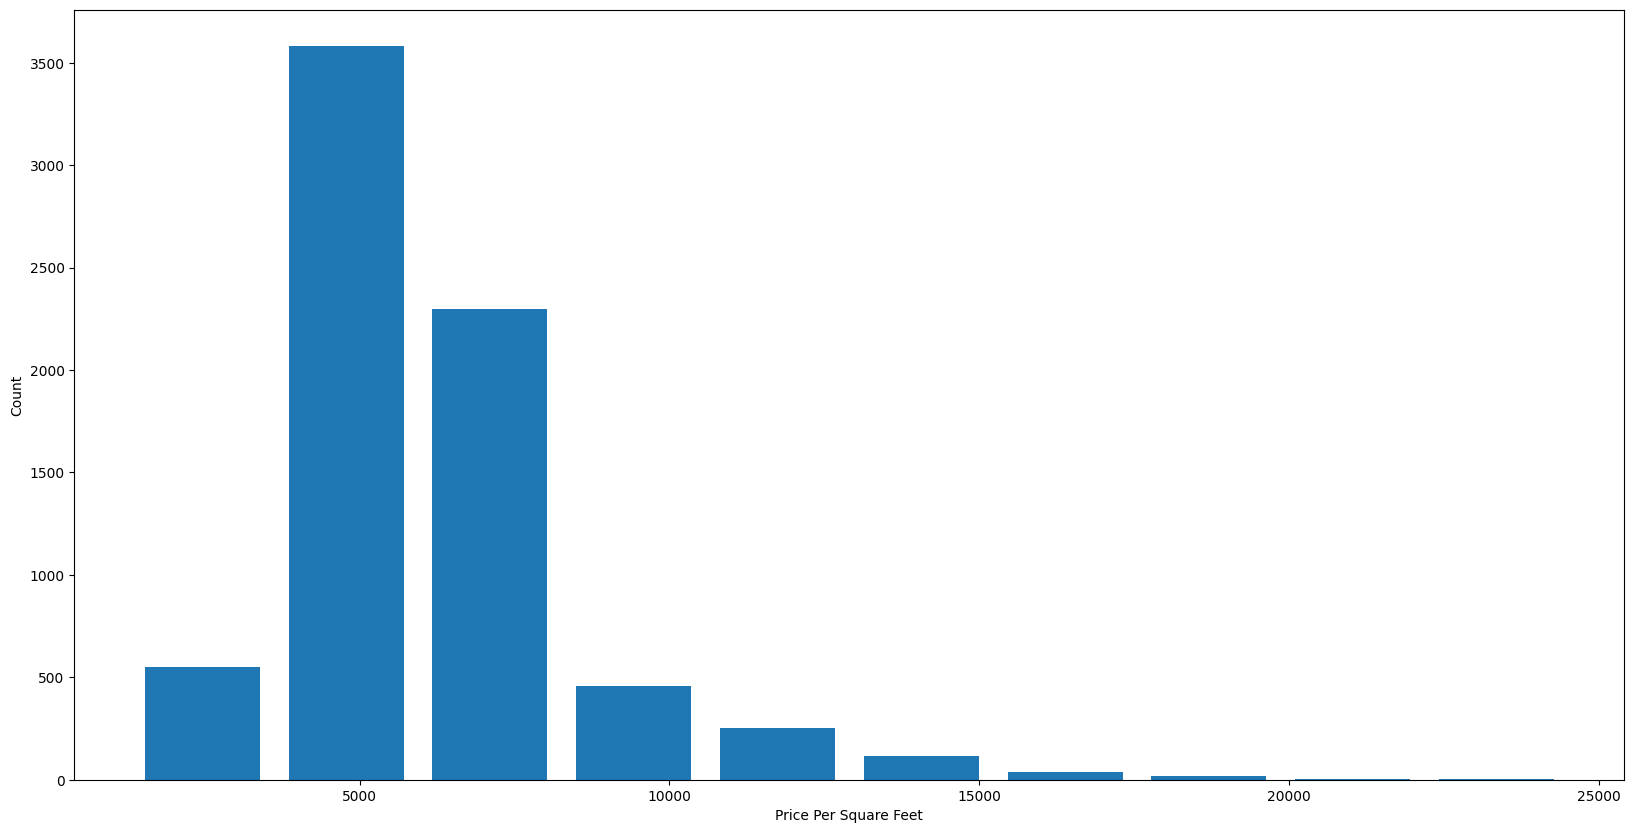

In [48]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [49]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [50]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

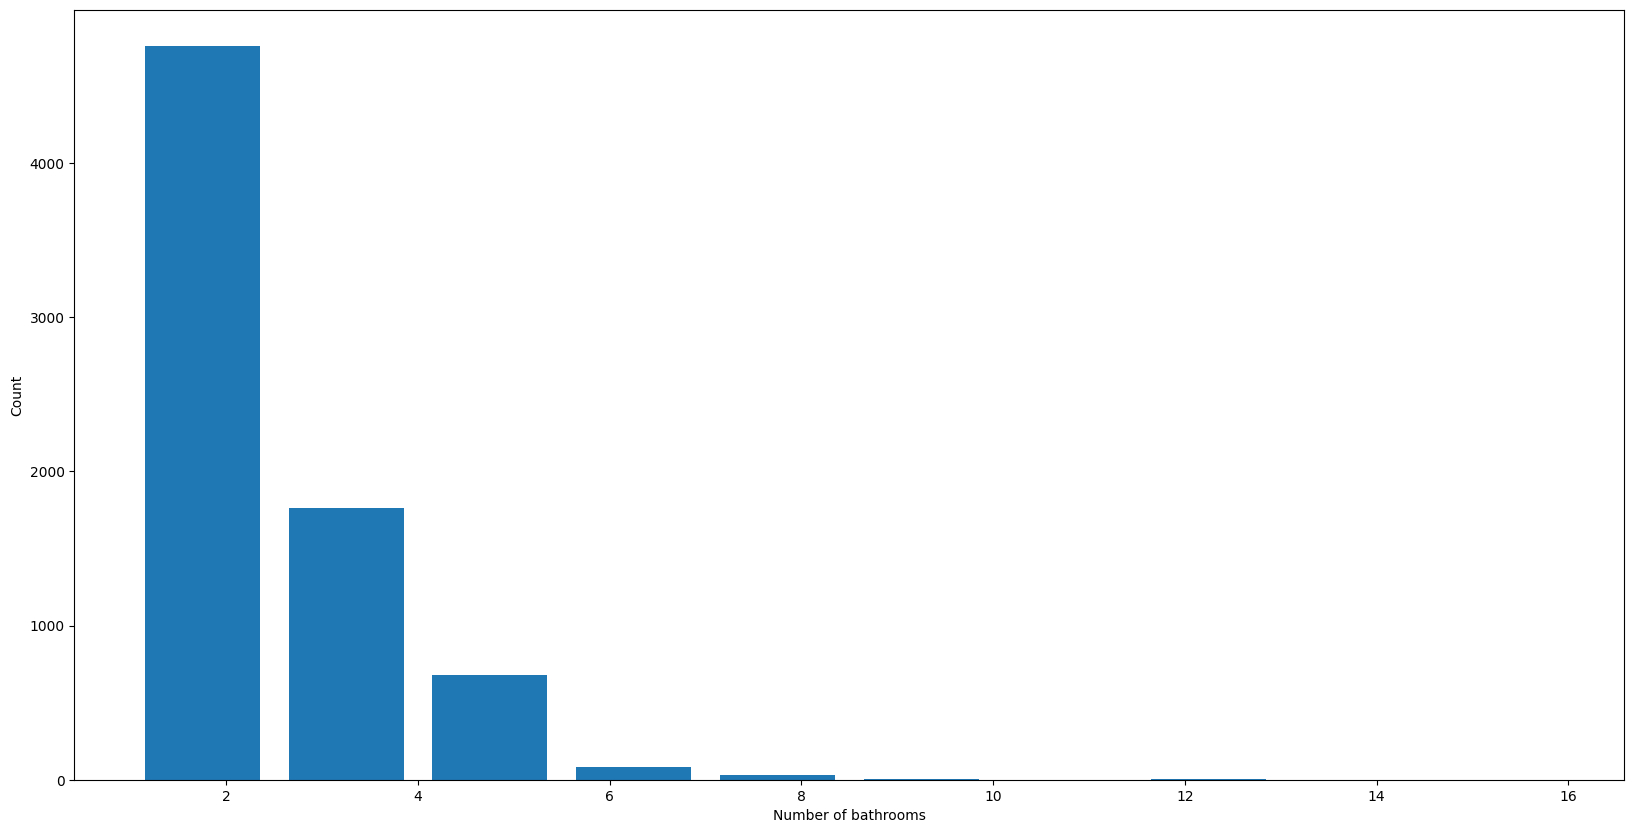

In [52]:
#plotting histogram for no. of properties with particular no. of bathrooms
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [53]:
#It is not understable to have more bathrooms than bedrooms so for upper limit consider properties with 2 no. of bathrooms greater than no. of bhk

df8 = df7[df7.bath < df7.bhk + 2]
df8.shape

(7239, 7)

In [54]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [55]:
#converting non numerical value column "location" into numbers
dummies = pd.get_dummies(df9.location, drop_first = True)
dummies.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
df10 = pd.concat([df9, dummies], axis = 'columns')
df10.shape

(7239, 245)

In [57]:
df11 = df10.drop('location', axis = 'columns')
df11.shape

(7239, 244)

In [58]:
#defining input for model
X = df11.drop('price', axis = 'columns')
X.shape

(7239, 243)

In [61]:
#defining target variable for training of model

y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [62]:
len(y)

7239

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model_linear = LinearRegression()

In [66]:
model_linear.fit(X_train, y_train)
model_linear.score(X_test, y_test)

0.8584962340272266

In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [70]:
#shuffle shift is used for splitting the dataset in n_splits count randomly and taking each and every datapoints
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 4)
scores = cross_val_score(LinearRegression(), X, y, cv = cv)
scores.mean()

np.float64(0.8557280683101128)

In [71]:
#using grid search CV testing different types of model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_tree': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 150, 200]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'fit_intercept': True}
1,lasso,0.738737,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.730331,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,random_tree,0.809530,{'n_estimators': 150}


In [72]:
#from above result, linear regression is best fit

In [74]:
#exporting model as pickle file
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model_linear,f)

In [75]:
#exporting column names or data for making prediction
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))